<br>

# <center>Jamboree Education - Linear Regression</center>

## About Jamboree

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problemsolving methods ensure maximum scores with minimum effort. They recently launched a feature where students/learners can come to
their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission
from an Indian perspective.

## Business Problem

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables

### Problem Statements

- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
- Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
- Use Non-graphical and graphical analysis for getting inferences about variables.
  - This can be done by checking the distribution of variables of graduate applicants.
- Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
- Check correlation among independent variables and how they interact with each other.
- Use Linear Regression from (Statsmodel library) and explain the results.
- Test the assumptions of linear regression:
   - Multicollinearity check by VIF score
   - Mean of residuals
   - Linearity of variables (no pattern in residual plot)
   - Test for Homoscedasticity
   - Normality of residuals
- Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
- Provide actionable Insights & Recommendations
- Try out different Linear Regressions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Jamboree_Admission.csv') 

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


###### First 10 rows of data

In [4]:
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


###### Last 10 rows of data

In [5]:
data.tail(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
490,491,307,105,2,2.5,4.5,8.12,1,0.67
491,492,297,99,4,3.0,3.5,7.81,0,0.54
492,493,298,101,4,2.5,4.5,7.69,1,0.53
493,494,300,95,2,3.0,1.5,8.22,1,0.62
494,495,301,99,3,2.5,2.0,8.45,1,0.68
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [82]:
data.set_index('Serial No.',inplace=True)

###### Shape of the data

In [83]:
data.shape

(500, 8)

###### Columns in dataset

In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

##### Viewing the overall information about the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


###### Data types of each columns

In [9]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

###### Statistical summary of the numerical variables in the dataset

In [10]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


###### Count of null values in dataset

In [11]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

###### Number of unique values in each columns

In [12]:
for i in data.columns:
    print(i,':',data[i].nunique())

Serial No. : 500
GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


In [13]:
data['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [14]:
data['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [15]:
data['LOR '].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

In [16]:
data['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

### Visual Analysis

### Research Done by Applicants.

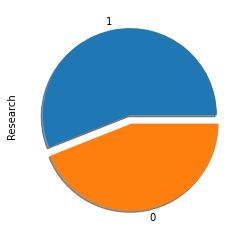

In [66]:
data.Research.value_counts().plot(kind='pie',shadow=True,explode=(0,0.1))
plt.show()


<b>Insights :</b>
- ><b>Most of the applicants have done some research.

### University rating Distribution

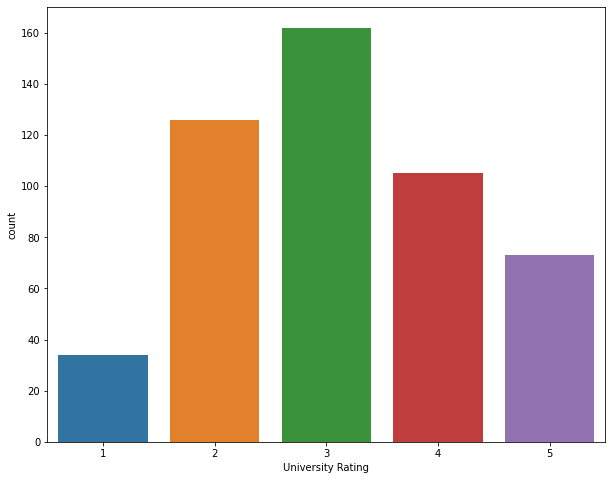

In [68]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'University Rating', data = data)
plt.show()

<b>Insights :</b>
- ><b>University 3 has the most rating

### SOP Distribution

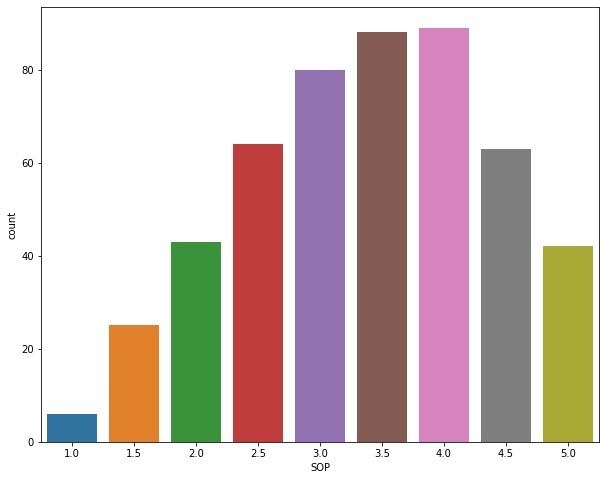

In [70]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'SOP', data = data)
plt.show()

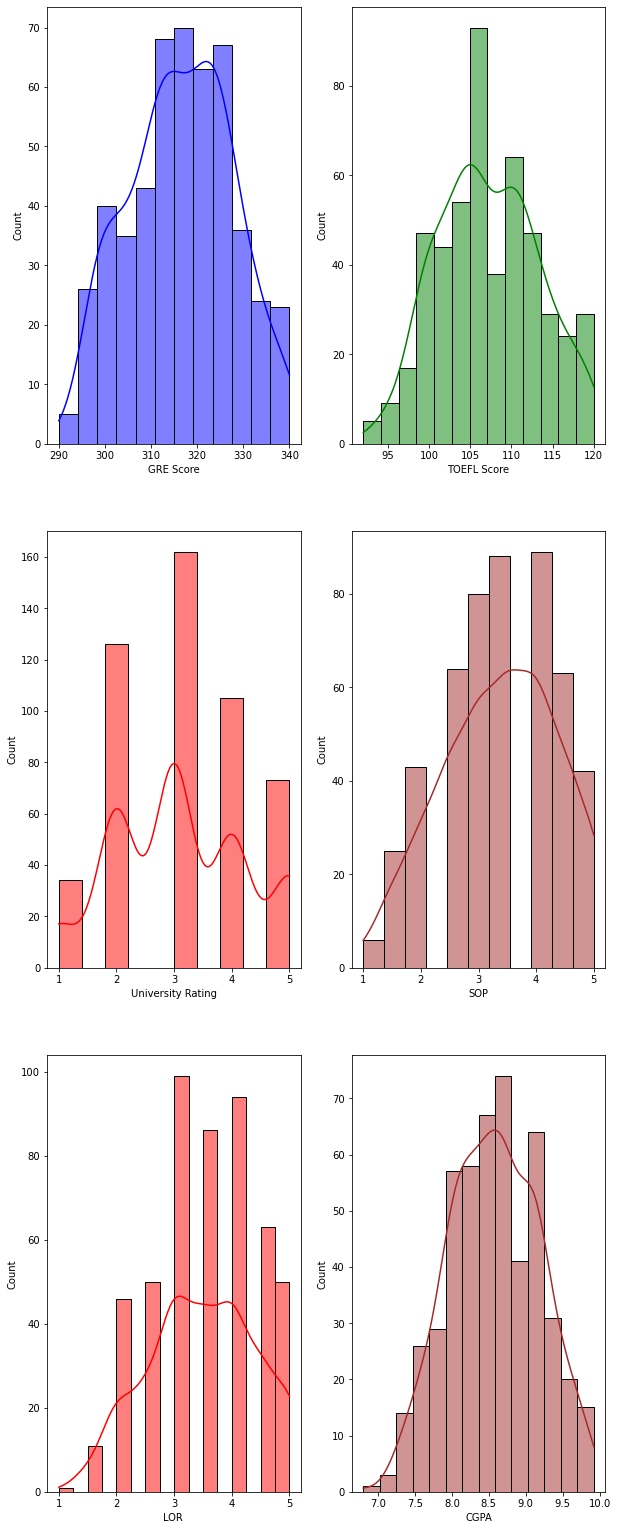

In [63]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
fig.subplots_adjust(top=1.5)
sns.histplot(data=data, x="GRE Score", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=data, x="TOEFL Score", kde=True,color="green", ax=axis[0,1])
sns.histplot(data=data, x="University Rating", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=data, x="SOP", kde=True,color="brown", ax=axis[1,1])
sns.histplot(data=data, x="LOR ", kde=True,color="red", ax=axis[2,0])
sns.histplot(data=data, x="CGPA", kde=True,color="brown", ax=axis[2,1])
plt.show()

<b>Insights :</b>
- ><b>From the above observation :-
    - > Values of University Rating,LOR, SOP are in the range of 0 to 5
    - > GRE score is in the range of 290 to 340
    - > TOEFL score is in the range of 90 to 120
    - > CGPA is in the range of 6.9 to 10

### Which university have high average GRE score

In [64]:
data.groupby('University Rating')['GRE Score'].mean()

University Rating
1    304.911765
2    309.134921
3    315.030864
4    323.304762
5    327.890411
Name: GRE Score, dtype: float64

<AxesSubplot:xlabel='University Rating'>

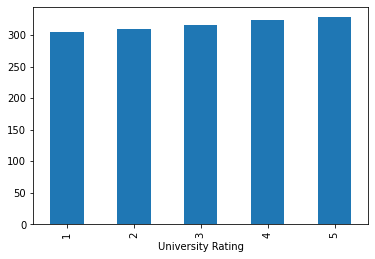

In [20]:
data.groupby('University Rating')['GRE Score'].mean().plot(kind='bar')

<b>Insights :</b>
- ><b>From the observation :-
    - > Mean GRE score incresing with University rating
    - > University rating 5 has most avg GRE score
    - > University rating 1 has least avg GRE score

### Which university have high average TOEFL Score

In [65]:
data.groupby('University Rating')['TOEFL Score'].mean()

University Rating
1    100.205882
2    103.444444
3    106.314815
4    110.961905
5    113.438356
Name: TOEFL Score, dtype: float64

<AxesSubplot:xlabel='University Rating'>

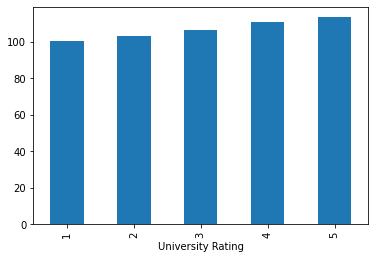

In [22]:
data.groupby('University Rating')['TOEFL Score'].mean().plot(kind='bar')

<b>Insights :</b>
- ><b>From the above observation :-
    - > Mean TOEFL Score incresing with University rating
    - > University rating 5 has most avg TOEFL Score
    - > University rating 1 has least avg TOEFL Score

### Which university have high average SOP Score

In [23]:
data.groupby('University Rating')['SOP'].mean()

University Rating
1    1.941176
2    2.682540
3    3.308642
4    4.000000
5    4.479452
Name: SOP, dtype: float64

<AxesSubplot:xlabel='University Rating'>

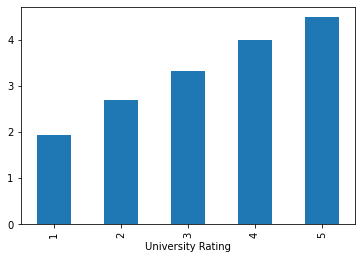

In [24]:
data.groupby('University Rating')['SOP'].mean().plot(kind='bar')

<b>Insights :</b>
- ><b>From the above observation :-
    - > Mean SOP incresing with University rating
    - > University rating 5 has most avg SOP
    - > University rating 1 has least avg SOP

### Which university have high average CGPA Score

In [25]:
data.groupby('University Rating')['CGPA'].mean()

University Rating
1    7.798529
2    8.177778
3    8.500123
4    8.936667
5    9.278082
Name: CGPA, dtype: float64

<AxesSubplot:xlabel='University Rating'>

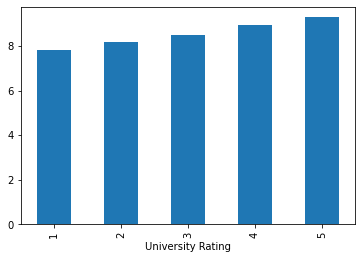

In [26]:
data.groupby('University Rating')['CGPA'].mean().plot(kind='bar')

<b>Insights :</b>
- ><b>From the above observation :-
    - > Mean SOP incresing with CGPA
    -> University rating 5 has most avg CGPA
    -> University rating 1 has least avg CGPA

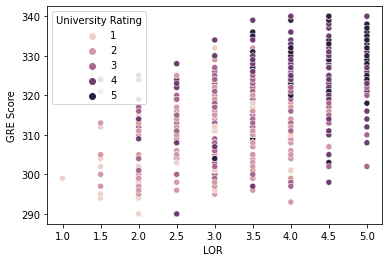

In [30]:
sns.scatterplot(x='LOR ',y='GRE Score',data=data,hue='University Rating')
plt.show()

<b>Insights :</b>
- ><b> GRE increasing w.r.t LOR

### GRE score vs University Rating

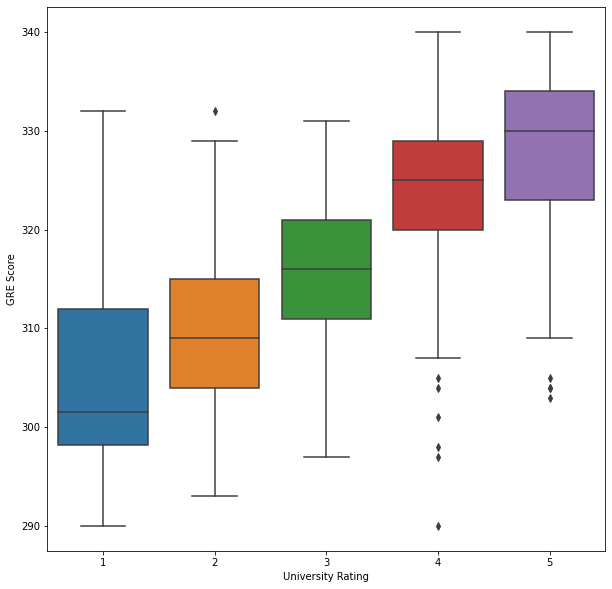

In [31]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'University Rating', y = 'GRE Score', data = data)
plt.show()

### TOEFL Score vs University Rating

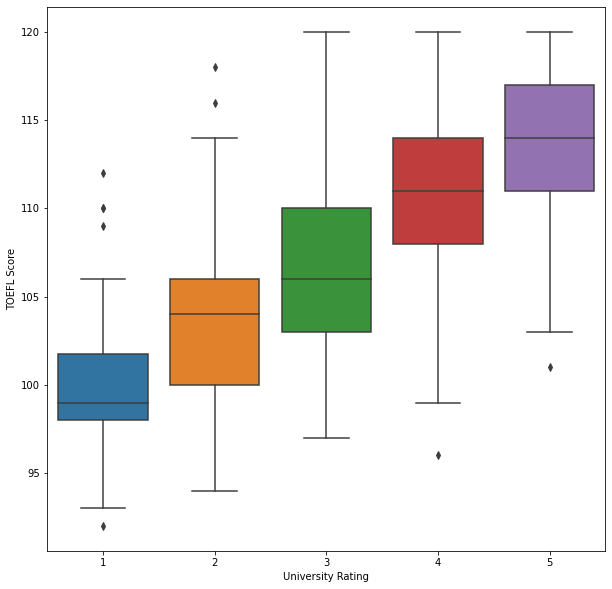

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'University Rating', y = 'TOEFL Score', data = data)
plt.show()

### Relation between variables

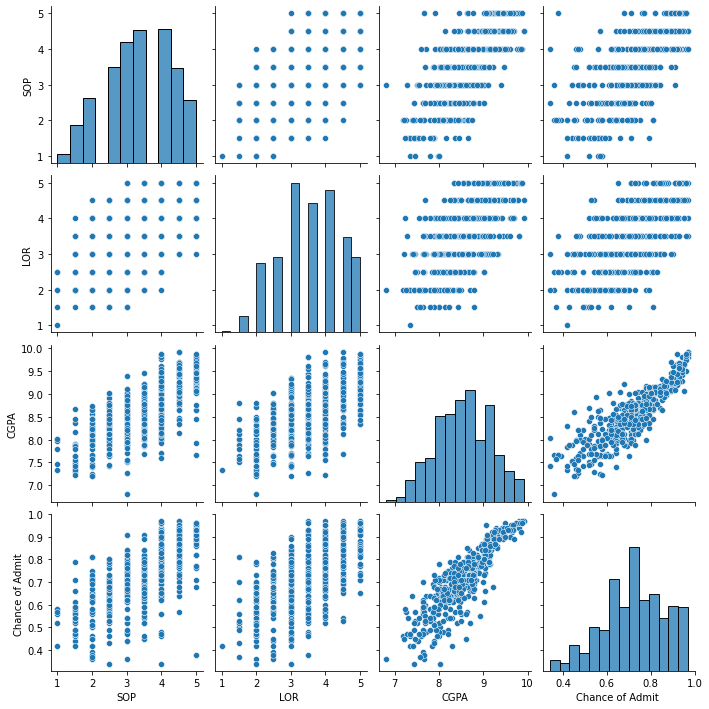

In [61]:
sns.pairplot(df.select_dtypes(include='float64'))

### Correlation between the features

<AxesSubplot:>

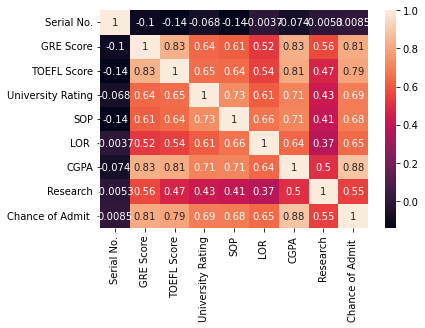

In [71]:
sns.heatmap(data.corr(),annot=True)

<b>Insights :</b>
- >'Chance of admit' has higher correlation with CGPA
->'Chance of admit' has second higher correlation with GRE score the TOFEL score

### CGPA vs Chance of Admit

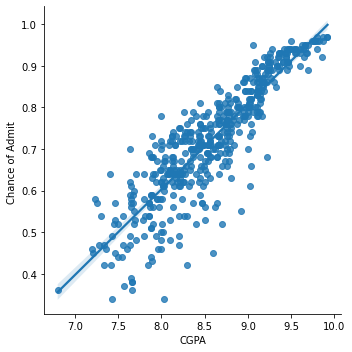

In [73]:
sns.lmplot(x='CGPA', y='Chance of Admit ', data=df)

In [84]:
df=data.copy()

In [85]:
# Feature binning: CGPA
bins=[6.5,7.5,8.5,9.5,11]
group=['second class','first class','first class & Distinction', 'Outstanding Perfomance']
df['CGPA_bin']= pd.cut(df['CGPA'],bins,labels=group)

In [86]:
# Feature binning: Chance of Admit
bins=[0,.5,.7,.8,.9,1]
group=['Low','Medium','Above Medium', 'High','Very High']
df['Chance_of_Admit_Bin']= pd.cut(df['Chance of Admit '],bins,labels=group)

In [87]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,CGPA_bin,Chance_of_Admit_Bin
Serial No.,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,Outstanding Perfomance,Very High
2,324,107,4,4.0,4.5,8.87,1,0.76,first class & Distinction,Above Medium
3,316,104,3,3.0,3.5,8.00,1,0.72,first class,Above Medium
4,322,110,3,3.5,2.5,8.67,1,0.80,first class & Distinction,Above Medium
5,314,103,2,2.0,3.0,8.21,0,0.65,first class,Medium
...,...,...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87,first class & Distinction,High
497,337,117,5,5.0,5.0,9.87,1,0.96,Outstanding Perfomance,Very High
498,330,120,5,4.5,5.0,9.56,1,0.93,Outstanding Perfomance,Very High


In [88]:
df['CGPA_bin'].value_counts()

first class & Distinction    236
first class                  213
Outstanding Perfomance        31
second class                  20
Name: CGPA_bin, dtype: int64

In [89]:
df['Chance_of_Admit_Bin'].value_counts()

Medium          174
Above Medium    145
High             81
Very High        61
Low              39
Name: Chance_of_Admit_Bin, dtype: int64

In [90]:
pd.crosstab(df['CGPA_bin'],df['Chance_of_Admit_Bin'])

Chance_of_Admit_Bin,Low,Medium,Above Medium,High,Very High
CGPA_bin,,,,,
second class,12,8,0,0,0
first class,26,135,51,1,0
first class & Distinction,1,31,94,78,32
Outstanding Perfomance,0,0,0,2,29


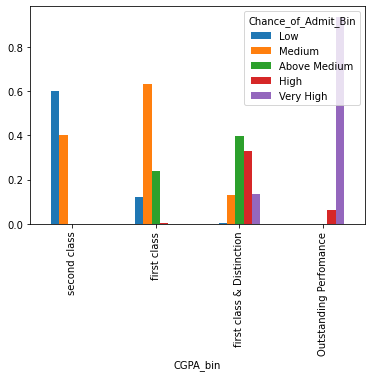

<Figure size 1080x576 with 0 Axes>

In [91]:
pd.crosstab(df['CGPA_bin'],df['Chance_of_Admit_Bin'],normalize='index').plot(kind='bar').figsize=(15,8)
plt.figure(figsize=(15,8))
plt.show()

<b>Insights :</b>
- ><b>From the above observation :-
    -  Applicants with Outstanding Perfomance have very high chance of admit to the prefered university.
    -  Applicants with first class & Distinction have high chance of admit.
    -  Applicants with first class chance of admit is medium.
    -  Applicants with second class chance of admit is low.

### Standardization of data

In [92]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler to the dataset
scaler.fit(data)

# Transform the dataset to have zero mean and unit variance
X_standardized = scaler.transform(data)
X=pd.DataFrame(X_standardized, columns=[
 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'])

In [93]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.051495
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.689797
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.477030
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,0.058582


In [95]:
y=X['Chance of Admit']
x=X.drop(['Chance of Admit'],axis=1)

In [96]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152


In [97]:
y

0      1.406107
1      0.271349
2     -0.012340
3      0.555039
4     -0.508797
         ...   
495    1.051495
496    1.689797
497    1.477030
498    0.058582
499    0.838728
Name: Chance of Admit, Length: 500, dtype: float64

###### Splitting the Data as Training and Testing data

In [98]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=100)

In [99]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [100]:
y_test

69     0.413194
29    -1.288944
471   -0.579720
344   -1.785400
54    -0.154185
         ...   
308   -0.225108
171    1.193340
457   -2.494624
75    -0.012340
311    0.838728
Name: Chance of Admit, Length: 150, dtype: float64

In [101]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [102]:
y_hat = model.predict(X_train)
print("Predicted Y Values")
print(y_hat[:3])
print("Actualy")
print(y_train[:3])

Predicted Y Values
[0.08550232 1.43262567 0.15408964]
Actualy
153    0.484116
84     1.547952
310    0.271349
Name: Chance of Admit, dtype: float64


In [103]:
model.score(X_train,y_train)

0.8132510822066584

In [104]:
print(model.coef_) # w1
print(model.intercept_) # w0

[0.090411   0.15138317 0.04242884 0.00388195 0.11296889 0.54621902
 0.09713738]
-0.024866812538764868


In [105]:
w=np.zeros((7,))
w=model.coef_
w0=model.intercept_
print('w :',w)
print('w0 :',w0)

w : [0.090411   0.15138317 0.04242884 0.00388195 0.11296889 0.54621902
 0.09713738]
w0 : -0.024866812538764868


In [106]:
w=np.reshape(w,(1,(len(w))))
w.shape

(1, 7)

###### Model

In [107]:
y_hat=np.dot(w,np.transpose(X_train))+w0
y_hat

array([[ 8.55023226e-02,  1.43262567e+00,  1.54089639e-01,
        -5.70140696e-01,  8.69529436e-01,  1.33924826e+00,
         7.41409059e-01, -1.17428786e+00, -1.07093828e+00,
         1.36712736e-01,  1.06977143e+00, -1.73385112e-01,
        -3.34531841e-01, -1.31133466e+00,  1.33035350e-01,
        -2.38221894e-02, -1.04109283e+00,  8.66305650e-01,
        -9.15541443e-01, -6.01008990e-01,  5.79726122e-02,
         1.77649090e+00, -2.04715354e-01,  7.88278815e-01,
        -4.02561995e-01,  8.06078551e-01,  3.88423081e-01,
        -1.45788435e+00, -2.83982298e-01, -8.09610395e-01,
        -1.91889028e+00,  1.51133518e+00,  1.06345798e+00,
        -1.23815816e+00,  6.46926516e-01, -2.65885746e-01,
         1.10996644e+00,  5.96287569e-01,  3.25903385e-01,
        -8.85667491e-01,  2.94001644e-01, -1.56785369e+00,
        -1.15406653e+00, -1.47711776e+00,  1.07711273e-01,
        -1.52809579e+00, -1.43103905e+00, -5.82759951e-01,
         1.83281801e-01, -9.06212261e-01,  1.03664898e+0

In [108]:
w

array([[0.090411  , 0.15138317, 0.04242884, 0.00388195, 0.11296889,
        0.54621902, 0.09713738]])

Here w[5] = 0.54621902 is the highest coefficient. So, the column CGPA is feature importance

###### Display model coefficients with column names

In [113]:
w=model.coef_
columns=np.array(x.columns)
for i in range(len(w)):
    print(columns[i],' :', w[i])

GRE Score  : 0.09041100444228009
TOEFL Score  : 0.15138316913460392
University Rating  : 0.0424288418292271
SOP  : 0.003881950858450026
LOR  : 0.11296889349260134
CGPA  : 0.5462190201662886
Research  : 0.09713738365964285


###### Scatterplot of y_predicted and y_actual

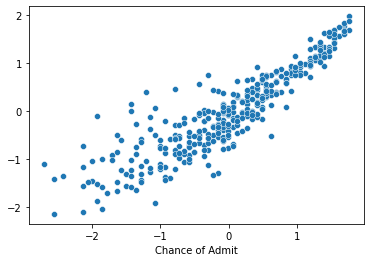

In [110]:
sns.scatterplot(x=y_train,y=model.predict(X_train))
plt.show()

In [114]:
y_test_pred=model.predict(X_test)

In [115]:
y_test_pred

array([ 0.97607234, -1.77440902, -0.66906869, -1.9331819 , -0.54505807,
        0.95824628, -0.94972795, -0.38151383,  0.65203107, -0.24316108,
       -0.39839899, -0.81207714,  1.22732156,  0.23598369, -0.59991421,
       -1.53965093, -0.9101761 ,  0.18894426, -1.16557055, -0.1271814 ,
        1.24135734, -0.77850785,  0.90478202,  0.74453432,  1.94795604,
       -0.84631611, -0.27988704,  1.51993933,  1.11697103, -0.14749348,
        0.48904655,  0.92582056,  0.19837706, -1.20538677,  0.1360968 ,
        0.42493282,  0.53947845, -1.02554683, -1.29212737, -0.14039671,
        1.60489426, -0.9149858 ,  0.81765601,  0.45935986,  0.64659667,
       -1.23477205, -0.86801973,  1.08201637,  1.62801231, -0.86830766,
        0.67853488, -0.08336846,  0.60338862,  1.90116695, -0.52067838,
        0.96080708, -0.71695757,  1.24316368,  0.35900833,  0.10310335,
       -0.24232526, -0.67403037, -1.71549464,  1.15696009, -0.49159212,
       -0.26258037, -0.11135112, -1.83187365,  0.82665037,  0.88

###### Distribution of predicted and actual

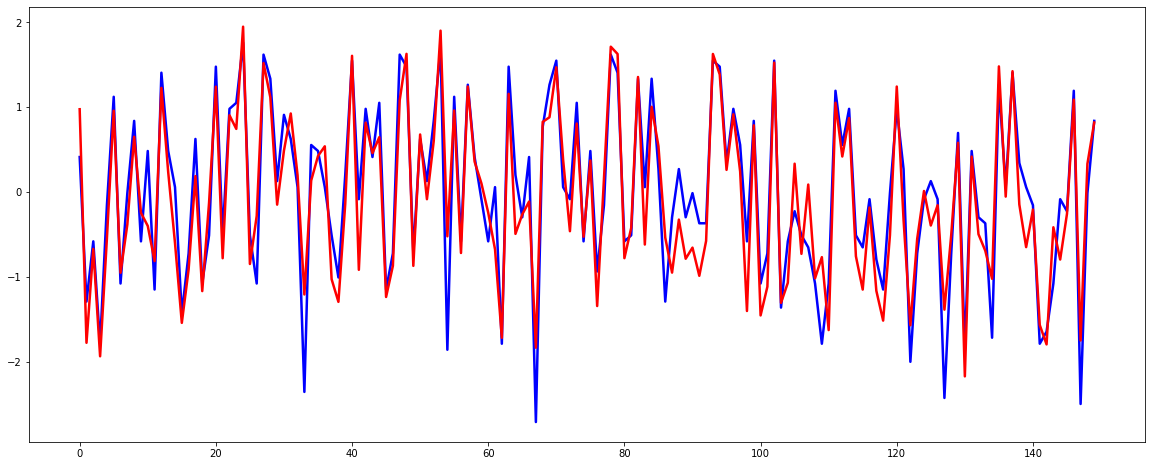

In [116]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.plot(c,y_test,color="blue",  linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred,color="red",  linewidth=2.5, linestyle="-")
plt.show()

###### Distribution of error

In [117]:
len(y_hat)

1

In [118]:
len(y_train)

350

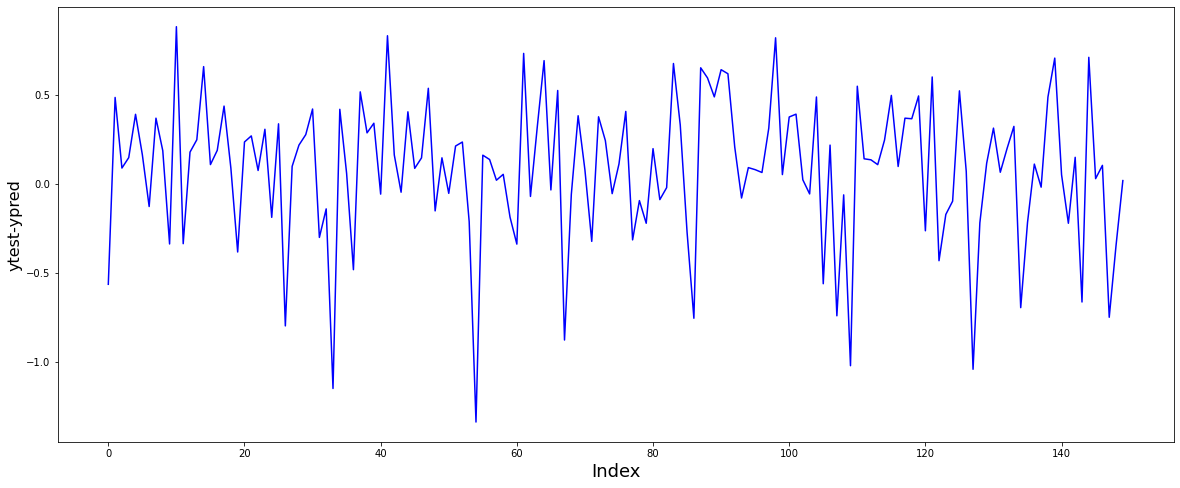

In [120]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.plot(c,y_test-y_test_pred,color="blue")
plt.xlabel('Index', fontsize=18)       # X-label
plt.ylabel('ytest-ypred', fontsize=16) # Y-label
plt.show()

### Testing the assumptions of the linear regression model

#### 1.Multicollinearity check by VIF score 

In [121]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [122]:
def multi_collinear():
    vif_1st=[]
    for i in x.columns:
        X1=x[i].values
        X2=x.drop(i,axis=1)
        X2=X2.values
        model.fit(X2, X1)
        X1_hat=model.predict(X2)
        den=sum(((X1-X1.mean())**2))
        num=sum((X1-X1_hat)**2)
        score=1-(num/den)
        vif=1/(1-(score))
        vif_1st.append(vif)
    return vif_1st
multi_collinear()

[4.464249139118501,
 3.9042133308172695,
 2.6210362171283137,
 2.835210350886523,
 2.033554860544099,
 4.777991929494222,
 1.4940078664337366]

### 2.The mean of residuals is nearly zero

In [123]:
y_test_pred

array([ 0.97607234, -1.77440902, -0.66906869, -1.9331819 , -0.54505807,
        0.95824628, -0.94972795, -0.38151383,  0.65203107, -0.24316108,
       -0.39839899, -0.81207714,  1.22732156,  0.23598369, -0.59991421,
       -1.53965093, -0.9101761 ,  0.18894426, -1.16557055, -0.1271814 ,
        1.24135734, -0.77850785,  0.90478202,  0.74453432,  1.94795604,
       -0.84631611, -0.27988704,  1.51993933,  1.11697103, -0.14749348,
        0.48904655,  0.92582056,  0.19837706, -1.20538677,  0.1360968 ,
        0.42493282,  0.53947845, -1.02554683, -1.29212737, -0.14039671,
        1.60489426, -0.9149858 ,  0.81765601,  0.45935986,  0.64659667,
       -1.23477205, -0.86801973,  1.08201637,  1.62801231, -0.86830766,
        0.67853488, -0.08336846,  0.60338862,  1.90116695, -0.52067838,
        0.96080708, -0.71695757,  1.24316368,  0.35900833,  0.10310335,
       -0.24232526, -0.67403037, -1.71549464,  1.15696009, -0.49159212,
       -0.26258037, -0.11135112, -1.83187365,  0.82665037,  0.88

In [124]:
y_test

69     0.413194
29    -1.288944
471   -0.579720
344   -1.785400
54    -0.154185
         ...   
308   -0.225108
171    1.193340
457   -2.494624
75    -0.012340
311    0.838728
Name: Chance of Admit, Length: 150, dtype: float64

In [125]:
Residuals=np.array(y_test-y_test_pred)
Residuals

array([-0.56287849,  0.48546547,  0.08934906,  0.14778161,  0.39087279,
        0.16417149, -0.12644842,  0.36917334,  0.18669714, -0.33655855,
        0.88251524, -0.33502162,  0.17878578,  0.24813255,  0.65849611,
        0.10886259,  0.18861168,  0.43701677,  0.08939417, -0.38161584,
        0.23567239,  0.26971061,  0.07579097,  0.30696106, -0.18723674,
        0.33751887, -0.79628933,  0.09893518,  0.21821392,  0.27699777,
        0.42060405, -0.29985953, -0.13979516, -1.14739266,  0.41894184,
        0.05918342, -0.48089656,  0.51674959,  0.28687339,  0.34082338,
       -0.05694214,  0.83172291,  0.16291698, -0.04616601,  0.40489871,
        0.08767329,  0.14645531,  0.53685815, -0.15098258,  0.14674324,
       -0.05257385,  0.21287274,  0.23533959, -0.21137004, -1.3356443 ,
        0.16161069,  0.13723794,  0.02109888,  0.05418552, -0.18636624,
       -0.33739438,  0.73261227, -0.06990565,  0.32006964,  0.6920188 ,
       -0.03344969,  0.52454498, -0.87551773, -0.05884456,  0.38

In [126]:
np.mean(Residuals)

0.08288937512920824

<b>Insights :
- We can see that mean of residuals is approxmatly equals to zero

### 3.Linearity of variables

C:\Users\jithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


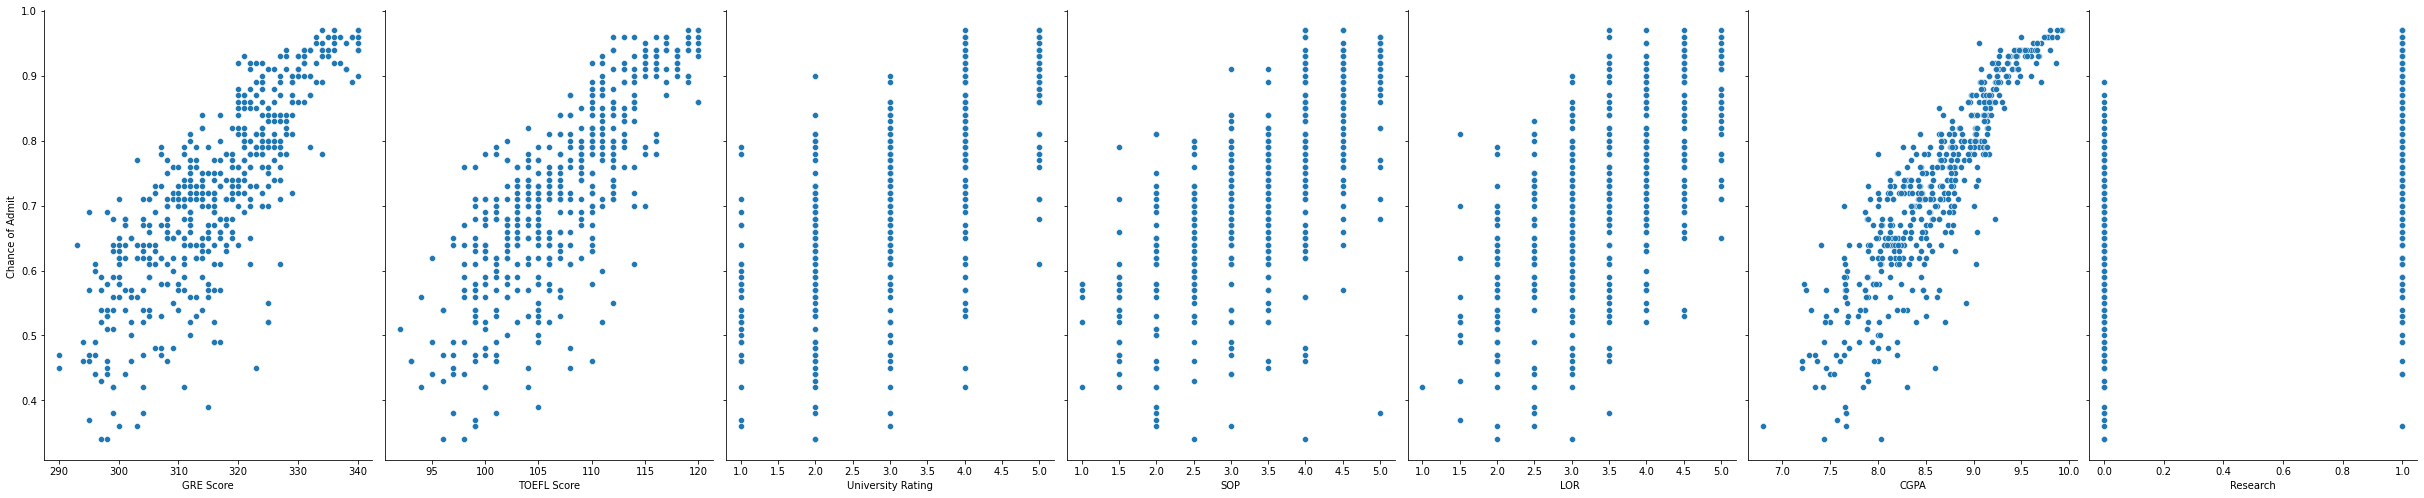

In [127]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'], y_vars='Chance of Admit ',size=7, aspect=0.7, kind='scatter')

## OR

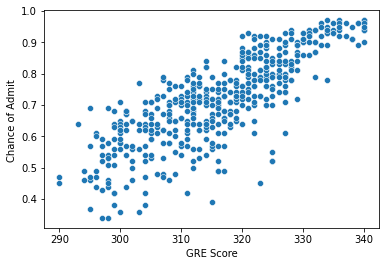

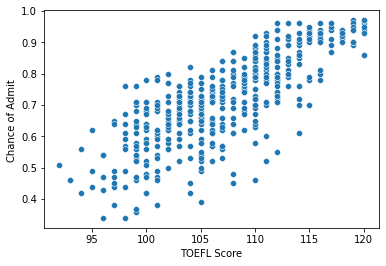

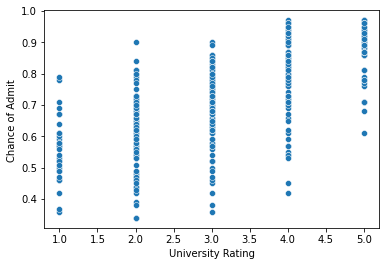

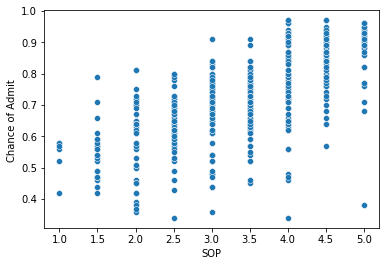

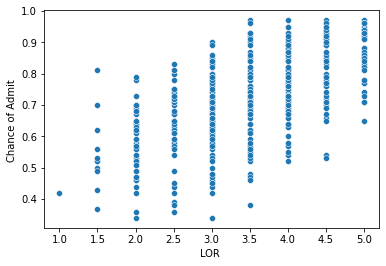

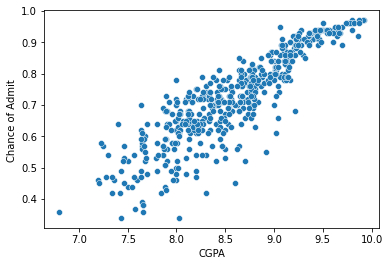

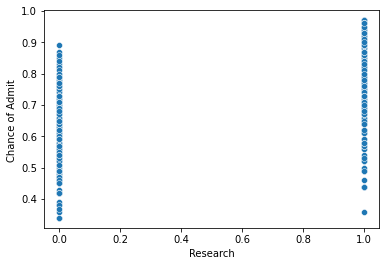

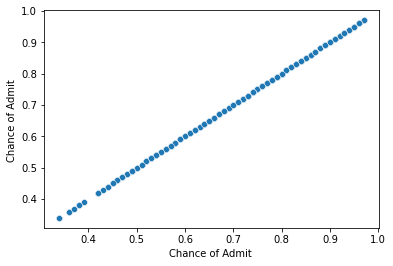

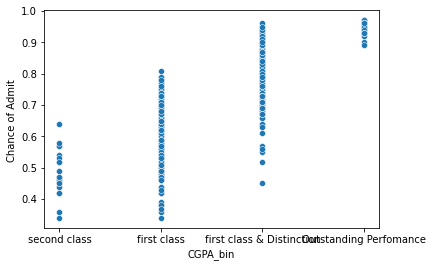

In [128]:
for i in df.columns:
    if i==df.columns[-1]:
        break
    else:
        fig,ax=plt.subplots(nrows=1,ncols=1)
        sns.scatterplot(x=df[i],y=df["Chance of Admit "])

<b>Insights :
- We can see that all features are are linear to dependent variable 'Chance of admit'

### 4.Test for Homoscedasticity

In [129]:
np.var(Residuals)

0.16460873092912473

#### We can see the variance of residuals are very low . So it obey Homocedasticty

In [131]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
69,1.021637,1.285102,0.775582,1.137360,0.558125,0.965827,0.886405
29,-0.573563,-1.348304,-0.975168,-1.892906,-1.605151,-2.112585,-1.128152
471,-0.484941,-0.689952,-0.099793,-1.387862,0.558125,-0.805087,-1.128152
344,-1.902897,-1.842067,-0.975168,-1.892906,-1.605151,-2.046382,-1.128152
54,0.489904,0.462163,-0.099793,-0.377773,0.017306,-0.954043,-1.128152
...,...,...,...,...,...,...,...
308,-0.396319,0.132987,-0.099793,0.127271,-0.523513,-0.076861,-1.128152
171,1.553371,1.614278,1.650957,0.632315,1.098944,0.816871,0.886405
457,-1.902897,-1.348304,-1.850542,-1.387862,-2.145970,-1.665719,-1.128152
75,1.110260,1.120514,-0.975168,-1.387862,0.558125,-0.027209,0.886405


In [132]:
m=X_test.copy()
m['Residuals']=Residuals
m['predicted_y']=y_test_pred
m

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Residuals,predicted_y
69,1.021637,1.285102,0.775582,1.137360,0.558125,0.965827,0.886405,-0.562878,0.976072
29,-0.573563,-1.348304,-0.975168,-1.892906,-1.605151,-2.112585,-1.128152,0.485465,-1.774409
471,-0.484941,-0.689952,-0.099793,-1.387862,0.558125,-0.805087,-1.128152,0.089349,-0.669069
344,-1.902897,-1.842067,-0.975168,-1.892906,-1.605151,-2.046382,-1.128152,0.147782,-1.933182
54,0.489904,0.462163,-0.099793,-0.377773,0.017306,-0.954043,-1.128152,0.390873,-0.545058
...,...,...,...,...,...,...,...,...,...
308,-0.396319,0.132987,-0.099793,0.127271,-0.523513,-0.076861,-1.128152,0.029908,-0.255016
171,1.553371,1.614278,1.650957,0.632315,1.098944,0.816871,0.886405,0.104448,1.088893
457,-1.902897,-1.348304,-1.850542,-1.387862,-2.145970,-1.665719,-1.128152,-0.747839,-1.746785
75,1.110260,1.120514,-0.975168,-1.387862,0.558125,-0.027209,0.886405,-0.345009,0.332669


<AxesSubplot:xlabel='predicted_y', ylabel='Residuals'>

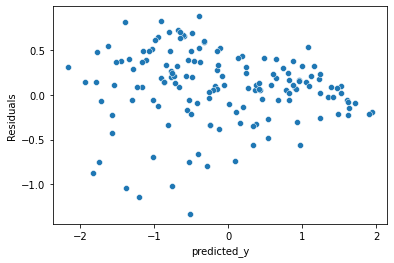

In [133]:
sns.scatterplot(x='predicted_y',y='Residuals',data=m)

<b>Insights :
- We can see that there is no Relation between predicted values and residuals

### 5.Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)


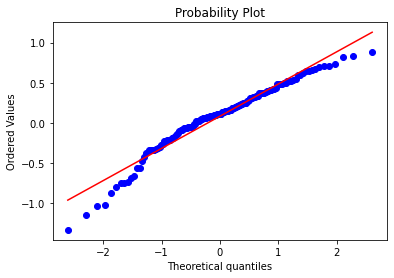

In [136]:
from scipy import stats
stats.probplot(Residuals,dist='norm',plot=plt)
plt.show()

<AxesSubplot:ylabel='Density'>

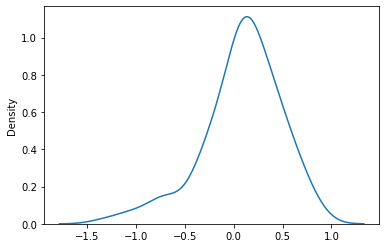

In [137]:
sns.kdeplot(Residuals)

### We can see that almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line

Text(0, 0.5, 'Predicted Y')

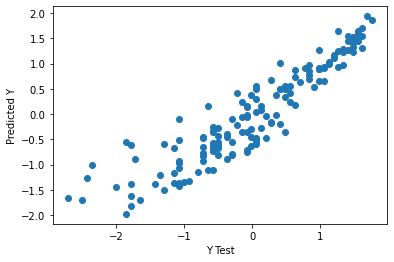

In [138]:
model.fit(X_test,y_test)
y_pred=model.predict(X_test)
## we can test homosedacity
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Model performance evaluation

#### Mean absolute error & Root mean squired error

In [139]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.17147937943843536
r_square_value : 0.8355717634850118


### R2

In [140]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8355717634850118

### Train and test performances are checked

In [141]:
print('Train data accuracy =', model.score(X_train,y_train))

Train data accuracy = 0.8013958974500986


In [142]:
print('Test data accuracy =',model.score(X_test,y_test))

Test data accuracy = 0.8498936286507525


<b>Insights :
- Test data have more accuracy than train data.

### Optional Step : Checking for P-value Using STATSMODELS

In [144]:
import statsmodels.api as sm
X_sm = x
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_sm = sm.add_constant(X_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y,X_sm).fit()

# print the coefficients
lm_1.params

const               -3.473784e-16
GRE Score            1.487321e-01
TOEFL Score          1.197053e-01
University Rating    4.813664e-02
SOP                  1.113691e-02
LOR                  1.105418e-01
CGPA                 5.073019e-01
Research             8.557436e-02
dtype: float64

In [145]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          8.21e-180
Time:                        20:41:45   Log-Likelihood:                -278.12
No. Observations:                 500   AIC:                             572.2
Df Residuals:                     492   BIC:                             605.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.474e-16      0.01

<b>Insights :
- By OLS method we can see that University Rating ,SOP ,const are insignificant features

In [146]:
X_c=pd.DataFrame(data=X_sm)
X_c['const'].value_counts()

1.0    500
Name: const, dtype: int64

In [147]:
X=x.copy()
X['constent']=1
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,constent
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,1
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,1
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,1
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,1
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,1


### Implementing the results and running the model again


In [151]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'constent'],
      dtype='object')

In [153]:
# Removing University Rating,GRE Score,SOP  from our dataset
X_train_new = X_train[['University Rating', 'TOEFL Score', 'LOR', 'CGPA','Research']]
X_test_new = X_test[['University Rating', 'TOEFL Score', 'LOR', 'CGPA','Research']]

In [154]:
# Model building
model.fit(X_train_new,y_train)

LinearRegression()

In [155]:
# Making predictions
y_pred_new = model.predict(X_test_new)

Text(0, 0.5, 'Sales')

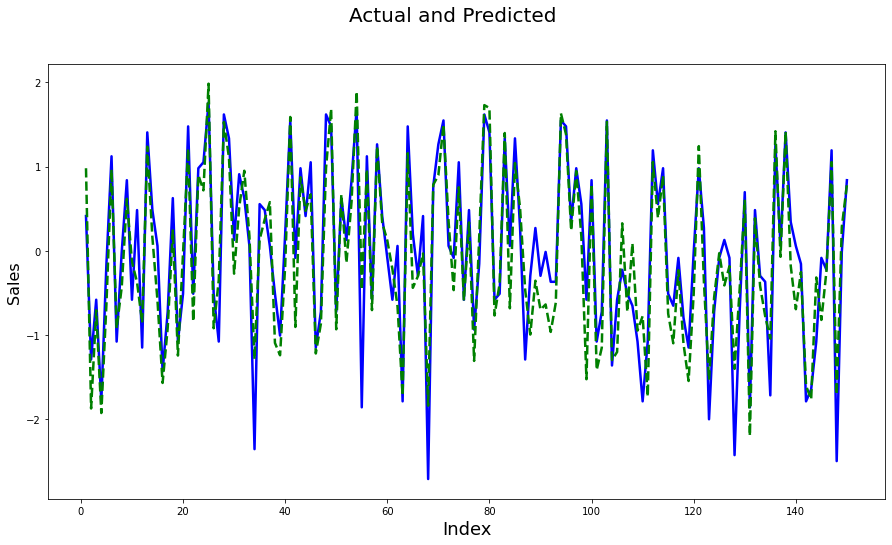

In [156]:
#Actual vs Predicted
c = [i for i in range(1,151,1)]
fig = plt.figure(figsize=(15,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_new, color="green",  linewidth=2.5, linestyle="--")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)   

In [157]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [158]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.18211763892286306
r_square_value : 0.8253709436993226


<b>Insights :
- Accuracy decrese by small amount when removing features GRE Score,SOP
- We only need to remove features when both ols method and vif score of features are insignificant

### Regularisation & Generalisation

In [162]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Ridge Regression

In [163]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [164]:
y_train

153    0.484116
84     1.547952
310    0.271349
494   -0.296030
126    0.909651
         ...   
343   -0.934332
359    0.625961
323   -0.721564
280   -0.296030
8     -1.572633
Name: Chance of Admit, Length: 350, dtype: float64

In [165]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

In [166]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [167]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011153,0.018863,0.001878,0.001297,0.0001,{'alpha': 0.0001},0.858930,0.719428,0.802121,0.763438,...,0.790772,0.046859,21,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731
1,0.002163,0.001852,0.000798,0.000746,0.001,{'alpha': 0.001},0.858930,0.719428,0.802121,0.763438,...,0.790772,0.046859,19,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731
2,0.000000,0.000000,0.000000,0.000000,0.005,{'alpha': 0.005},0.858931,0.719429,0.802121,0.763440,...,0.790772,0.046859,18,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731
3,0.000000,0.000000,0.000000,0.000000,0.007,{'alpha': 0.007},0.858931,0.719429,0.802120,0.763441,...,0.790772,0.046859,17,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731
4,0.000000,0.000000,0.000000,0.000000,0.001,{'alpha': 0.001},0.858930,0.719428,0.802121,0.763438,...,0.790772,0.046859,19,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731


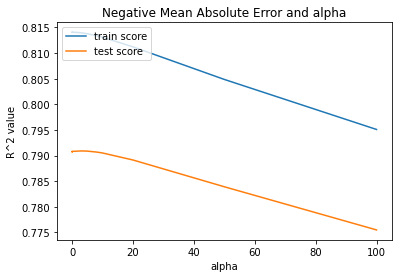

In [168]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R^2 value')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<b>Insights :
- By hyperparameter tuning best alpha = 5

In [169]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([0.10450454, 0.15398373, 0.04601386, 0.011072  , 0.11489609,
       0.51643932, 0.09517811])

In [170]:
y_pred_ridge=ridge.predict(X_test)

In [171]:
mse = mean_squared_error(y_test, y_pred_ridge)
r_squared = r2_score(y_test, y_pred_ridge)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.1693704358941976
r_square_value : 0.8375939883672355


<b>Insights :
- In Ridge regression By 5 fold cross validation method we can see that our model can accuratly predict at confidently above 83.75%

### Lasso Regression

In [174]:
lasso = Lasso()

In [175]:
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [176]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004388,0.005801,0.001197,3.991849e-04,0.0001,{'alpha': 0.0001},0.858945,0.719471,0.802133,0.763562,...,0.790815,0.046838,6,0.794999,0.828307,0.813622,0.824048,0.809394,0.814074,0.011731
1,0.001197,0.000399,0.000998,1.124365e-06,0.001,{'alpha': 0.001},0.859080,0.719856,0.802231,0.764679,...,0.791199,0.046651,4,0.794985,0.828297,0.813620,0.824035,0.809392,0.814066,0.011730
2,0.001197,0.000399,0.000997,6.307512e-04,0.005,{'alpha': 0.005},0.859494,0.720504,0.802624,0.769378,...,0.792581,0.046146,3,0.794668,0.828238,0.813580,0.823716,0.809348,0.813910,0.011770
3,0.001596,0.000489,0.000997,9.725608e-07,0.007,{'alpha': 0.007},0.858857,0.720687,0.802800,0.771558,...,0.793031,0.045728,2,0.794613,0.828202,0.813541,0.823396,0.809304,0.813811,0.011730
4,0.001595,0.000488,0.000997,6.309775e-04,0.001,{'alpha': 0.001},0.859080,0.719856,0.802231,0.764679,...,0.791199,0.046651,4,0.794985,0.828297,0.813620,0.824035,0.809392,0.814066,0.011730


In [177]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

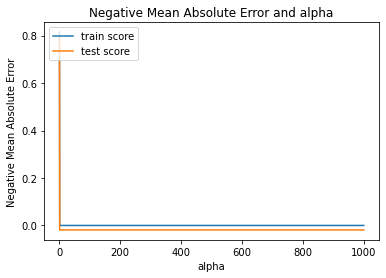

In [178]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


<b>Insights :
- By hyperparameter tuning best alpha =0.0001

In [180]:
alpha =0.0001
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train) 
lasso.coef_

array([0.09041277, 0.15135204, 0.04240747, 0.0038597 , 0.1129189 ,
       0.54622509, 0.09708024])

In [181]:
y_pred_lasso=lasso.predict(X_test)

In [182]:
mse = mean_squared_error(y_test, y_pred_lasso)
r_squared = r2_score(y_test, y_pred_lasso)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.17146829923334972
r_square_value : 0.8355823880778254


<b>Insights :
- In lasso regression By 5 fold cross validation method we can see that our model can accuratly predict at confidently above 83.55%

## Recommendations

- CGPA and Research are the only two variables which are important in making the prediction for Chance of Admit.
- CGPA is the most important varibale in making the prediction for the Chance of Admit.
- Features which influence the chance of Admit are
  - GRE Score
  - TOEFL Score
  - CGPA
  - LOR greater or equal to than 4.5
- A higher University rating will increases the chance of admission
- A higher value of LOR and SPO will also increases the chance of admission for the student